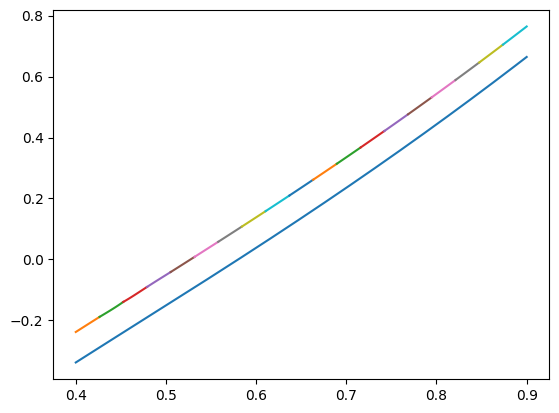

In [165]:
import numpy as np
import matplotlib.pyplot as plt

brd = [0.4, 0.9]

def f(x):
    return x*x + np.log10(x)

def df(x):
    return 2*x + 0.434294481903/x

def ddf(x): # для 2-го краевого условия
    return 2 - 0.434294481903/x/x


def Schplein_build():

    # === Метод монотонной прогонки и его комплектующие ================= #

    C = [0] + [hs[i] / (hs[i] + hs[i+1]) for i in range (0,n-1)] + [0]
    A = [0] + [hs[i+1] / (hs[i] + hs[i+1]) for i in range (0,n-1)] + [0]
    B = [1] + [2]*(n-1) + [1]

    F = [ddf(brd[0])] + [6/(hs[i] + hs[i+1]) * ((ys[i+1]-ys[i])/hs[i+1] \
        - (ys[i]-ys[i-1])/hs[i]) for i in range(0, n-1)] + [ddf(brd[1])]
    
    α = [-C[0] / B[0]]
    β = [F[0] / B[0]]

    M = [ddf(brd[1])]

    for i in range(0, n-1):
        α.append(-C[i] / (α[i]*A[i] + B[i]))
        β.append((F[i] - β[i]*A[i]) / (α[i]*A[i] + B[i]))

    for i in range(0, n-1):
        M.append(α[n-i-1]*M[i] + β[n-i-1])
    M.append(ddf(brd[0]));   M = M[::-1]

    # ================================================================== #

    a = M[:-1:]
    b = [(M[i+1] - M[i])/hs[i+1] for i in range(0, n)]
    c = [(ys[i+1] - ys[i])/hs[i+1] - hs[i+1]/6 * (2*M[i] + M[i+1]) for i in range(0, n)]

    return [a, b, c]


def Schplein(x, i):
    return ys[i] + L[2][i]*(x-xs[i]) + L[0][i]*(x-xs[i])**2 /2 + L[1][i]*(x-xs[i])**3 /6


xs = np.linspace(*brd, 20)
n = len(xs)-1
hs = [abs(xs[_] - xs[_-1]) for _ in range(0,n+1)]
ys = [f(_) for _ in xs]

L = Schplein_build()
# plt.ylim(-1/4,1)

x__ = np.linspace(*brd, 200)
plt.plot(x__, f(x__)-0.1)

for i in range(n):
    xl = np.linspace(xs[i], xs[i+1], 10)
    yl = Schplein(xl, i)

    plt.plot(xl, yl)


In [166]:
def norm(lst):
    return max(list(map(np.fabs, lst)))

ns = [3,5,10,20,30,40,55,70,85,100]
Ds = []; ds = []

print("n	∆                       δ")
print("="*55)

for ni in ns:
    
    yspl = []
    xs = np.linspace(*brd, ni)
    n = ni-1
    hs = [abs(xs[_] - xs[_-1]) for _ in range(0,n+1)]
    ys = [f(_) for _ in xs]

    L = Schplein_build()

    for i in range(n):
        xl = np.linspace(xs[i], xs[i+1], 10)
        yl = Schplein(xl, i)

        yspl += [*yl]
    
    other_ys = f(np.linspace(*brd, n * 10))

    NormSpl = norm(np.array(yspl) - other_ys)
    NormFunc = norm(other_ys)

    Ds.append(NormSpl); ds.append(NormSpl/NormFunc*100)

    print(ni, NormSpl, NormSpl/NormFunc*100, sep='\t')


n	∆                       δ
3	0.02657652239531516	3.477498577619378
5	0.020834876998188034	2.7262127846661173
10	0.011019545698680688	1.4418912272709108
20	0.005629692032292688	0.7366368610433391
30	0.00377302924772549	0.4936952866562626
40	0.002836397613686592	0.37113842512731626
55	0.0020664905636801345	0.2703972283871234
70	0.0016252243827840074	0.21265820243057781
85	0.0013392201969057993	0.17523497847408387
100	0.0011388024326822732	0.1490106109797188


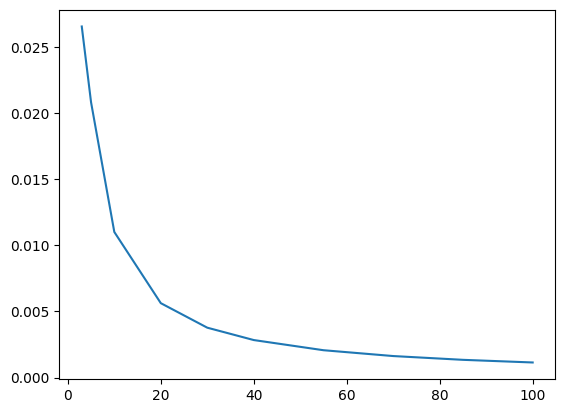

In [167]:
plt.plot(ns, Ds)
# plt.plot(ns, ds)